In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eps_list = [1, 0.1, 0.01, 0.005]

In [3]:
def f(x, eps):
  i = np.arange(1,11)
  linear = 1/eps * i @ x
  logarithmic = np.ones(10) @ np.log(1 - np.power(x, 2))
  return linear - logarithmic 

In [4]:
def g(x, eps):
  i = np.arange(1,11)
  linear = 1/eps * i
  logarithmic = - 2 * x / (1 - np.power(x, 2))
  return linear - logarithmic

In [5]:
def h(x):
  return np.diag((2 * np.power(x, 2) + 2) / np.power((1 - np.power(x, 2)), 2))

In [6]:
def zeta(x, eps):
  return np.sqrt(g(x, eps).T @ np.linalg.inv(h(x)) @ g(x, eps))

In [10]:
zetas = {}
for eps in eps_list:
  x = np.zeros(10)
  zetas[eps] = []
  while (zeta(x, eps) > 1e-6):
    x = x - 1/(1 + zeta(x, eps)) * np.linalg.inv(h(x)) @ g(x, eps)
    zetas[eps].append(zeta(x, eps))

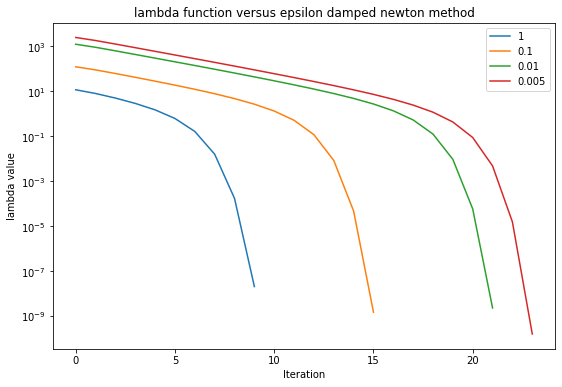

In [14]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
for eps in zetas:
  ax.plot(np.arange(len(zetas[eps])), np.array(zetas[eps]), label=eps)
ax.set_yscale('log')
ax.set_ylabel('lambda value')
ax.set_xlabel('Iteration')
ax.set_title('lambda function versus epsilon damped newton method')
ax.legend()